In [1]:
#PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

#Other libraries
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("..")

#Custom python files
from model.model import *
from training import *
from util.dataloader import *

In [2]:
heuristic = TrainingAndEvaluation(model='heuristic', collate_fn=PadSequence)

In [3]:
input_dim = 8
hidden_dim = 50
batch_size = 20
num_epochs = 15
total_num_games = 7000

LSTM_agg = TrainingAndEvaluation(input_dim, hidden_dim, num_epochs=num_epochs, model='LSTM_baseline', collate_fn=PadSequence,
                                     batch_size=batch_size, total_num_games=total_num_games,
                                      feature_folder='../data/mixed/features_agg/', label_folder='../data/mixed/labels/')

In [4]:
LSTM_agg.model.model = torch.load('../saved_model/model_agg.pt')

In [5]:
input_dim = 24
hidden_dim = 50
batch_size = 20
num_epochs = 15
total_num_games = 7000

LSTM_indi = TrainingAndEvaluation(input_dim, hidden_dim, num_epochs=num_epochs, model='LSTM_baseline', collate_fn=PadSequence,
                                     batch_size=batch_size, total_num_games=total_num_games,
                                      feature_folder='../data/mixed/features/', label_folder='../data/mixed/labels/')

In [6]:
LSTM_indi.model.model = torch.load('../saved_model/model_indi.pt')

In [7]:
input_dim = 8
hidden_dim = 50
batch_size = 20
num_epochs = 50
total_num_games = 7000

LSTM_agg_h2v_sub = TrainingAndEvaluation(input_dim, hidden_dim, model='LSTM_with_h2v', num_epochs=num_epochs, batch_size=batch_size, collate_fn=PadSequence, 
                            total_num_games=total_num_games, feature_folder='../data/mixed/features_agg/', 
                            label_folder='../data/mixed/labels/', embedding_folder='../data/mixed/embedding_feature/')

In [8]:
LSTM_agg_h2v_sub.model.model = torch.load('../saved_model/model_agg_h2v_subnet.pt')

In [9]:
input_dim = 24
hidden_dim = 50
batch_size = 20
num_epochs = 50
total_num_games = 7000

LSTM_indi_h2v_sub = TrainingAndEvaluation(input_dim, hidden_dim, model='LSTM_with_h2v', num_epochs=num_epochs, batch_size=batch_size, collate_fn=PadSequence, 
                            total_num_games=total_num_games, feature_folder='../data/mixed/features/', 
                            label_folder='../data/mixed/labels/', embedding_folder='../data/mixed/embedding_feature/')

In [10]:
LSTM_indi_h2v_sub.model.model = torch.load('../saved_model/model_indi_h2v_subnet.pt')

In [11]:
threshold = 0.1
percentage = 0.05

acc_heuristic = heuristic.get_accuracy(threshold=threshold, percentage=percentage)

acc_LSTM_agg = LSTM_agg.get_accuracy(threshold=threshold, percentage=percentage)

acc_LSTM_indi = LSTM_indi.get_accuracy(threshold=threshold, percentage=percentage)

acc_LSTM_agg_h2v_sub = LSTM_agg_h2v_sub.get_accuracy(threshold=threshold, percentage=percentage)

acc_LSTM_indi_h2v_sub = LSTM_indi_h2v_sub.get_accuracy(threshold=threshold, percentage=percentage)

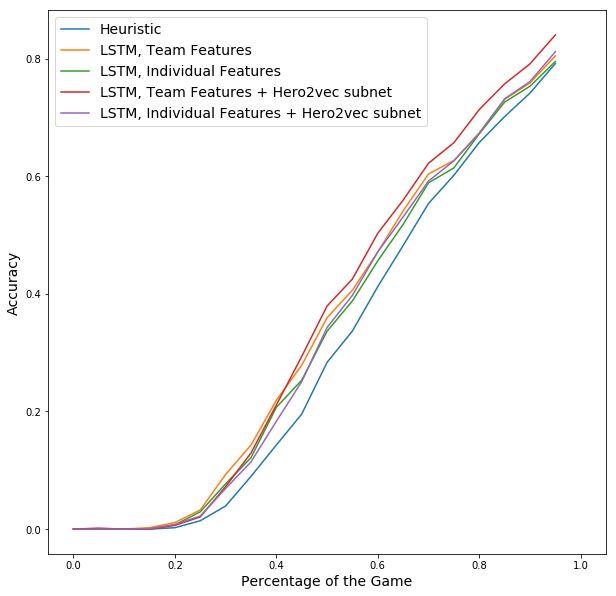

In [12]:
per = np.arange(0,1.0,percentage)
plt.figure(0, figsize=(10,10))
plt.plot(per, acc_heuristic, label='Heuristic')
plt.plot(per, acc_LSTM_agg/20.0, label='LSTM, Team Features')
plt.plot(per, acc_LSTM_indi/20.0, label='LSTM, Individual Features')
plt.plot(per, acc_LSTM_agg_h2v_sub/20.0, label='LSTM, Team Features + Hero2vec subnet')
plt.plot(per, acc_LSTM_indi_h2v_sub/20.0, label='LSTM, Individual Features + Hero2vec subnet')
plt.xlim(-0.05,1.05)
plt.xlabel('Percentage of the Game', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.show()

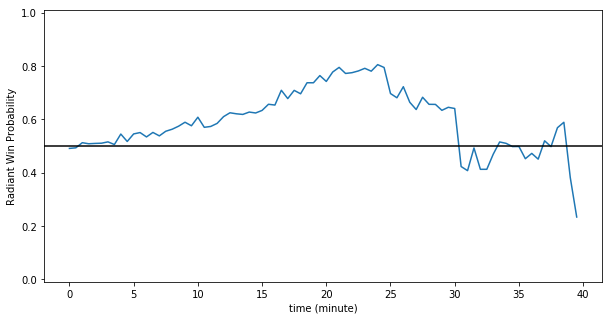

In [13]:
sample_graph = LSTM_agg_h2v_sub.get_single_game_prediction(55)

test = sample_graph.numpy().squeeze()
test1 = np.concatenate((test[0].reshape(1),test[0].reshape(1),test))

tt = np.zeros(sample_graph.numpy().squeeze().shape)
for i in range(len(tt)):
    tt[i] = np.average(test1[i:i+3])

time_stamp = 0.5*np.arange(len(sample_graph.numpy().squeeze()))

plt.figure(2,figsize=(10,5))
plt.plot(time_stamp, test)
plt.axhline(0.5, color='k', linestyle='-')
plt.ylim(-0.01,1.01)
plt.xlabel('time (minute)')
plt.ylabel('Radiant Win Probability')
plt.show()